In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

C:\Users\Acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Bitácora - Experimento de Rayos X

Por ahora, en la mayoría de las actividades solo se graficaron los datos obtenidos teniendo en cuenta que eso es lo que pide el cuaderno del profesor.

Juan José Guzmán Mejía (202214541) & Juan Sebastián Sánchez (202121498)
j.guzmanm@uniandes.edu.co & js.sanchezl1@uniandes.edu.co

Primera Sesión: Nomviembre 8 - 2024 (16:30 a 20:00).
Segunda Sesión: Noviembre 15 - 2024 (16:30 a 19:30).

Los datos fueron tabulados en un archivo excel llamado "rayosx_data1.xlsx" y guardados en un repositorio de GitHub (https://github.com/QuantumPower4/LabIntermedio2024-2/tree/main/Rayos%20X)

# Marco Teórico

En 1895, Wilhelm Conrad Rontgen estaba experimentando con rayos catódicos y accidentalmente vio una misteriosa luminiscencia de un papel pintado con alguna sustancia fluorescente sensible a la luz, probablemente (platino-cianuro de bario). El papel estaba a cierta distancia de un tubo de descarga de gas con el que Conrad se encontraba trabajando y aun después de haber cubierto el tubo, la fluorescencia no disminuía. 

Los rayos X se producen cuando una partícula cargada eléctricamente, como un electrón, se desacelera al interactuar con un material metálico que actúa como blanco. Los electrones son emitidos cuando se calienta el cátodo y son acelerados por una diferencia de potencial $U_A$ generada entre el cátodo y el ánodo. Los rayos X se generan solo a un voltaje mínimo, el cual depende únicamente del material usado como blanco. Los materiales más comunes son Cu, Mo, Cr, Fe, Co, Ag y W.


Los rayos X producidos por electrones pueden originarse a partir de dos procesos:

En primer lugar, cuando los electrones incidentes tienen la energía suficiente para expulsar un electrón de un orbital interior del material del ánodo, la vacancia dejada es rápidamente ocupada por un electrón de un orbital superior, generando así \emph{Rayos X característicos}. Estos rayos X forman un espectro discreto, característico del material del ánodo.

En el segundo proceso, los electrones se frenan bruscamente en el material, emitiendo radiación electromagnética. Los rayos X producidos en este caso son conocidos como radiación de frenado o \emph{Bremsstrahlung}, generando un espectro continuo.

La intensidad de los rayos X emitidos varía para diferentes voltajes aceleradores como función de la longitud de onda. Experimentalmente, se observa que la intensidad es cero por debajo de cierto valor de longitud de onda, denominada longitud de onda mínima $\lambda_{\text{min}}$. Si el potencial aplicado $U_A$ en el tubo aumenta, $\lambda_{\text{min}}$ se reduce según la ecuación:

\begin{equation}
    \lambda_{\text{min}} = \frac{12.40}{U_A} \, (\text{$A^°$}),
\end{equation}


conocida como la ley de Duane-Hunt, donde $U_A$ está en kV y $\lambda_{\text{min}}$ en $A^°$. El primer máximo local en la intensidad aparece aproximadamente en $1.5\lambda_{\text{min}}$.


El espectro continuo de rayos X para el tubo de Cu muestra dos líneas estrechas y de mayor intensidad que corresponden a la radiación característica $K_\alpha$ y $K_\beta$. La energía de estos picos y sus respectivas longitudes de onda dependen del material usado como blanco. Para el Cu, las líneas características $K_\alpha$ forman un doblete con una diferencia de energía de aproximadamente 20 eV. Sus longitudes de onda son $K_{\alpha1} = 1.54056$ $A^°$ y $K_{\alpha2} = 1.54439$ $A^°$. En el Cuadro de abajo se presentan las líneas características principales de emisión para diferentes materiales.


| Ánodo        | Cu    | Mo    | Cr    | Fe    | Co    | Ag    | W     |
|--------------|-------|-------|-------|-------|-------|-------|-------|
| $\lambda(K_\alpha$ \AA) | 1.54  | 0.71  | 2.29  | 1.94  | 1.79  | 0.56  | 0.21  |

**Tabla:** Líneas características principales de emisión para distintos materiales.


Cuando los rayos X inciden en cualquier forma de materia, por ejemplo, una capa de material de espesor $d$, una parte de ellos interactúa con el material produciendo efectos fotoeléctricos y Compton, lo que reduce la intensidad. La intensidad de los rayos X decae exponencialmente según la ecuación:


\begin{equation}
    I = I_0 e^{-\mu(\lambda,Z)d},
\end{equation}


donde $\mu$ es el coeficiente de absorción lineal, que depende de la longitud de onda de los rayos X y del número atómico $Z$. La constante $I_0$ es la intensidad de los rayos X incidentes e $I$ es la intensidad del rayo transmitido después de atravesar una distancia $d$ en el material.

La relación entre la absorción primaria y el número atómico $Z$ del material absorbente está dada por:

\begin{equation}
    \frac{\mu}{\rho} = k (\lambda^3Z^3),
\end{equation}

donde $k$ es una constante que depende de $\lambda$, especialmente si esta es mayor o menor que la longitud de onda característica de transiciones en el cascarón K.

Por otro lado, cuando los rayos X inciden sobre los planos de un cristal, son reflejados bajo la condición de Bragg:


\begin{equation}
    2d \sin \theta = n \lambda \quad  \text{con }
 (n=1,2,3,\ldots),
\end{equation}


donde $d$ es la distancia interplanar en el cristal, $\theta$ es el ángulo de incidencia respecto a los planos del cristal y $n$ es el orden de difracción. Usando esta ley, es posible medir la intensidad para cada longitud de onda, cambiando solo el ángulo de incidencia.

En particular para este experimento, a bajas intensidades, la radiación del ambiente puede interferir en las mediciones y debe medir primero el ambiente aplicando un voltaje $U_a = $ 0kV. En conteos a altas tazas se puede hacer una leve corrección considerando el tiempo muerto del contador Geiger. 

\begin{equation}
    N^* = \frac{N^*}{1-\tau N^*}
\end{equation}
con un $\tau = 90\mu s$

En esta sesión, estudiamos la producción de rayos X y medimos el espectro característico para \(Cu\), verificando la ley de desplazamiento de Duane-Hunt y calculando la constante de Planck mediante una regresión lineal de los datos obtenidos. Además, medimos la atenuación de rayos X en diferentes materiales, calculamos el cambio de longitud de onda debido al efecto Compton y registramos la variación de intensidad del espectro. Para esto, utilizamos cristales de LiF y KBr, un contador Geiger-Müller y el equipo de rayos X con ánodo de cobre. El análisis de estos datos permite comprender los procesos de generación, interacción y absorción de los rayos X.

In [2]:
DataFrame1 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 1", skiprows=1)
DataFrame2 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 2", skiprows=2)
DataFrame31 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 3.1", skiprows=1)
DataFrame32 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 3.2", skiprows=2)
DataFrame4 = pd.read_excel(io = "rayosx_data1.xlsx", sheet_name = "Actividad 4", skiprows=1)

# Procedimiento y resultados

Los componentes que se utilizaron en el experimento incluyen una unidad básica de rayos X de 35 kV (proporcionado por PHYWE), cristales de LiF y KBr, un tubo contador con cable BNC y filtros, un computador, un tubo de rayos X desmontable con ánodo de cobre, y láminas metálicas de diferentes materiales y grosores.

En la unidad básica de rayos X, se lleva a cabo el siguiente proceso físico: el cátodo se calienta para liberar electrones del material de emisión. Estos electrones son luego acelerados por una diferencia de potencial hasta que alcanzan el ánodo, donde se frenan bruscamente. Este frenado da lugar a la emisión de radiación, que se presenta en forma de rayos X. Además, algunos electrones pueden interactuar con los átomos del material del ánodo, provocando transiciones electrónicas que generan rayos X característicos.

Posteriormente, los rayos X generados atraviesan un diafragma o colimador, pasando por cristales especializados antes de llegar a un contador de Geiger-Müller, que mide la radiación.

# Calibración

Se usó el tubo de rayos X con ánodo de cobre, el diafragma de mayor diámetro y el cristal de LiF en una base giratoria. Se ajustó el voltaje y la corriente del equipo a 35 kV y 1 mA, respectivamente. Se selecció el modo acoplado (Cristal + Tubo Geiger-Muller) y se buscó el máximo de intensidad moviendo el equipo en intervalos de 0.1° para corrgir cualquier desviación con respecto al valor teórico.

Se pudo determinar que el máximo de intensidad era de 20.5°, por lo que está alejado del valor teórico por 2.1°. Este valor se sumará a los ángulos medidos por el montaje.

In [336]:
calibre = 22.6 - 20.5
calibre

2.1000000000000014

In [337]:
cu_theta = DataFrame1["theta/°"].to_numpy() + calibre
cu_intensidad = DataFrame1["R(35kV)/Imp/s"].to_numpy() 

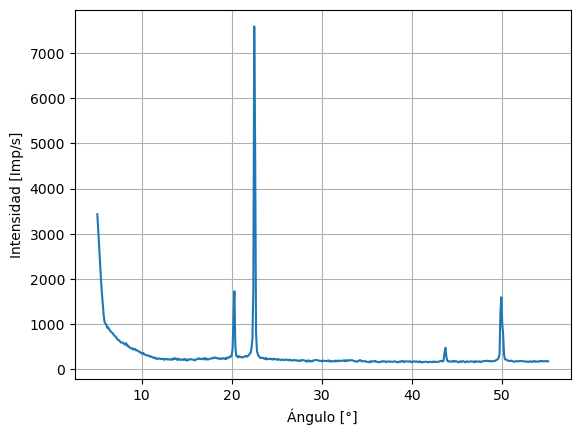

In [338]:
plt.plot(cu_theta, cu_intensidad)
plt.ylabel("Intensidad [Imp/s]")
plt.xlabel("Ángulo [°]")
plt.grid(True)

Adicionalmente, se hizo un algoritmo de optimización para poder determinar la mejor fase de manera que el espectro en los dos ordenes (n=1 y n=2) se alineen.

In [339]:
d = 2.014 #Armstrong
fase_values = np.linspace(-1, 1, 1000)
best_fase = None
min_error = float('inf')

best_orden1x, best_orden1y = [], []
best_orden2x, best_orden2y = [], []

err_orden1x, err_orden1x = [], []

for fase in fase_values:
    orden1x, orden1y = [], []
    orden2x, orden2y = [], []
    
    for i in range(len(cu_theta)):
        if 18 <= cu_theta[i] <= 25:
            orden1x.append(2 * d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden1y.append(cu_intensidad[i])
        
        elif 41 <= cu_theta[i] <= 55:
            orden2x.append(d * np.sin((cu_theta[i] - fase) * np.pi / 180))
            orden2y.append(cu_intensidad[i])

    error = sum((np.interp(orden1x, orden2x, orden2y, left=0, right=0) - orden1y) ** 2)
    
    if error < min_error:
        min_error = error
        best_fase = fase
        best_orden1x, best_orden1y = orden1x, orden1y
        best_orden2x, best_orden2y = orden2x, orden2y

best_fase

0.039039039039038936

# Actividad 1 - Rayos X característicos del cobre

Se conectó la unidad de rayos X al computador mediante el puerto correspondiente y usó el programa Measure para configurar una nueva medición de rayos X. Se capturó el espectro y se exportaron los datos para graficar intensidad contra longitud de onda utilizando la ley de Bragg. A continuación, se ajustaron los picos de intensidad comparando entre un ajuste Lorentziano y un perfil Voigt. Se calcularon las longitudes de onda para las líneas $K_\alpha$ y $K_\beta$ usando los primeros dos órdenes de difracción (n = 1 y n = 2) del espectro característico de Cu con el cristal de LiF, analizando también el rango angular apropiado para cada orden.

In [340]:
DataFrame1

,theta/°,R(35kV)/Imp/s
0,3.0,3432
1,3.1,3091
2,3.2,2730
3,3.3,2370
4,3.4,2005
...,...,...
496,52.6,183
497,52.7,187
498,52.8,179
499,52.9,187


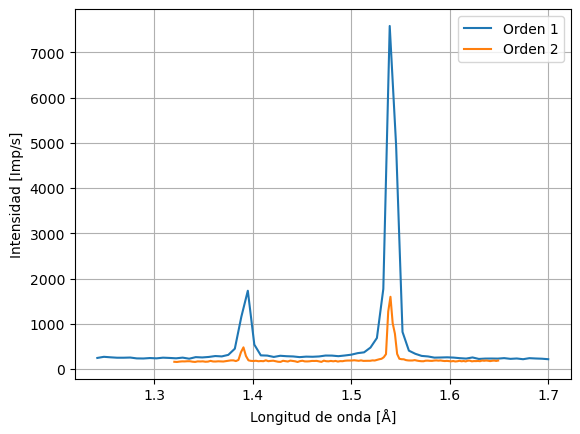

In [341]:
plt.plot(best_orden1x, best_orden1y, label="Orden 1")
plt.plot(best_orden2x, best_orden2y, label="Orden 2")
plt.legend()
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Intensidad [Imp/s]")
plt.grid()
plt.show()

In [342]:
orden1x_1, orden1y_1 = [], []
orden1x_2, orden1y_2 = [], []

orden2x_1, orden2y_1 = [], []
orden2x_2, orden2y_2 = [], []


for i in range(len(best_orden1x)):
    if 1.35 <= best_orden1x[i] <= 1.45:
        
        orden1x_1.append(best_orden1x[i])
        orden1y_1.append(best_orden1y[i])
        
    if 1.47 <= best_orden1x[i] < 1.6:
        
        orden1x_2.append(best_orden1x[i])
        orden1y_2.append(best_orden1y[i])
        
for i in range(len(best_orden2x)):
    if 1.33 <= best_orden2x[i] < 1.45:
        
        orden2x_1.append(best_orden2x[i])
        orden2y_1.append(best_orden2y[i])
        
    if 1.51 <= best_orden2x[i] < 1.58:

        orden2x_2.append(best_orden2x[i])
        orden2y_2.append(best_orden2y[i])

## Ajuste Lorentziano

In [425]:
def Lorentzian(x, A, B, C,D):
    return A*(B**2)/( np.pi*((x-C)**2 + (B**2)) ) +D

In [426]:
params1, pcov1 = sc.optimize.curve_fit(Lorentzian,orden1x_1,orden1y_1)
inc1 = np.sqrt(np.diag(pcov1))
params1, inc1

(array([7.36220690e+03, 3.25446013e-03, 1.39239954e+00, 2.50700193e+02]),
 array([5.75139487e+02, 2.61265516e-04, 7.78262514e-05, 7.56956852e+00]))

In [345]:
params2, pcov2 = sc.optimize.curve_fit(Lorentzian,orden1x_2,orden1y_2)
inc2 = np.sqrt(np.diag(pcov2))
params2, inc2

(array([ 3.87162860e+04, -3.10299439e-03,  1.54144074e+00,  2.01484438e+02]),
 array([4.19089911e+03, 3.27461430e-04, 9.06342683e-05, 3.93397811e+01]))

Text(0, 0.5, 'Residuales Normalizados')

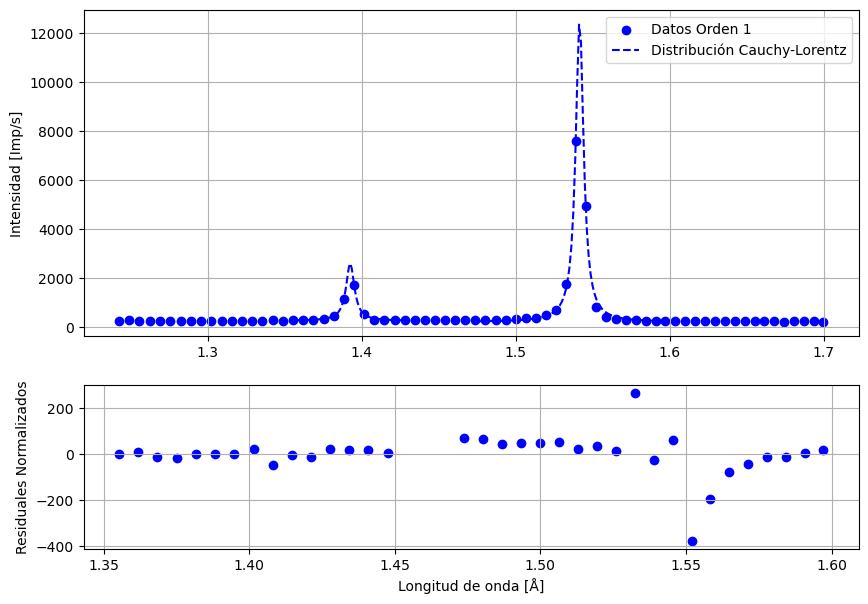

In [363]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx1 = np.linspace(orden1x_1[0],orden1x_1[-1],100)
plotx2 = np.linspace(orden1x_2[0],orden1x_2[-1],100)

axis[0].scatter(best_orden1x, best_orden1y, color = "#0000ff", label="Datos Orden 1")

axis[0].plot(plotx1, Lorentzian(plotx1,*params1), color = "#0000ff", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx2, Lorentzian(plotx2,*params2), color = "#0000ff", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals11 = orden1y_1 - Lorentzian(orden1x_1, *params1)
residuals12 = orden1y_2 - Lorentzian(orden1x_2, *params2)

axis[1].scatter(orden1x_1,residuals11, color = "#0000ff")
axis[1].scatter(orden1x_2,residuals12, color = "#0000ff")
axis[1].grid()

axis[1].set_xlabel("Longitud de onda [Å]")
axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_ylabel("Residuales Normalizados")

In [347]:
params3, pcov3 = sc.optimize.curve_fit(Lorentzian,orden2x_1,orden2y_1)
inc3 = np.sqrt(np.diag(pcov3))
params3, inc3

(array([1.11018048e+03, 1.99869184e-03, 1.38974395e+00, 1.69009669e+02]),
 array([5.60610542e+01, 1.46338734e-04, 9.01979171e-05, 1.72524067e+00]))

In [348]:
params4, pcov4 = sc.optimize.curve_fit(Lorentzian,orden2x_2,orden2y_2)
inc4 = np.sqrt(np.diag(pcov4))
params4, inc4

(array([4.71965739e+03, 2.82996547e-03, 1.53958365e+00, 1.49223448e+02]),
 array([2.42121794e+02, 2.27762280e-04, 1.62824514e-04, 1.85611480e+01]))

Text(0, 0.5, 'Residuales Normalizados')

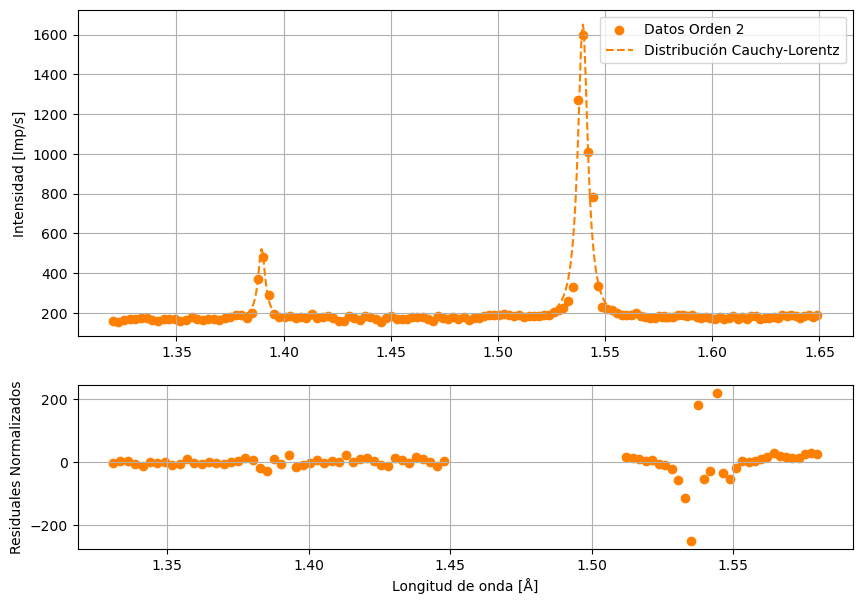

In [364]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx12 = np.linspace(orden2x_1[0],orden2x_1[-1],200)
plotx22 = np.linspace(orden2x_2[0],orden2x_2[-1],200)

axis[0].scatter(best_orden2x, best_orden2y, color = "#ff8000", label="Datos Orden 2")

axis[0].plot(plotx12, Lorentzian(plotx12,*params3), color = "#ff8000", label="Distribución Cauchy-Lorentz", linestyle="--")
axis[0].plot(plotx22, Lorentzian(plotx22,*params4), color = "#ff8000", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals21 = orden2y_1 - Lorentzian(orden2x_1, *params3)
residuals22 = orden2y_2 - Lorentzian(orden2x_2, *params4)

axis[1].scatter(orden2x_1,residuals21, color = "#ff8000")
axis[1].scatter(orden2x_2,residuals22, color = "#ff8000")
axis[1].grid()

axis[1].set_xlabel("Longitud de onda [Å]")
axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_ylabel("Residuales Normalizados")

In [368]:
hc = 123.984193 #eV nm

In [394]:
k_alpha_teo = 1.5424 #A
k_beta_teo = 1.3922 #A

E_alpha_teo = hc/k_alpha_teo
E_beta_teo = hc/k_beta_teo

E_alpha_teo, E_beta_teo

(80.38394255705394, 89.05630872001149)

In [401]:
k_alpha_1 = params2[2]
k_alpha_2 = params4[2]
sigma_k_alpha_1 = inc2[2]
sigma_k_alpha_2 = inc4[2]
k_alpha_1, sigma_k_alpha_1

(1.5414407411137887, 9.063426826334653e-05)

In [404]:
k_alpha_2, sigma_k_alpha_2

(1.5395836521919941, 0.0001628245140811155)

In [402]:
energy_alpha1 = hc/k_alpha_1
sigma_energy_alpha1 = hc*sigma_k_alpha_1/k_alpha_1**2
energy_alpha1, sigma_energy_alpha1

(80.4339665438021, 0.0047293895294012135)

In [403]:
energy_alpha2 = hc/k_alpha_2
sigma_energy_alpha2 = hc*sigma_k_alpha_2/k_alpha_2**2
energy_alpha2, sigma_energy_alpha2

(80.53098824703454, 0.008516860393474896)

In [405]:
k_beta_1 = params1[2]
k_beta_2 = params3[2]
sigma_k_beta_1 = inc1[2]
sigma_k_beta_2 = inc3[2]
k_beta_1, sigma_k_beta_1

(1.3923995365600987, 7.782625135560247e-05)

In [406]:
k_beta_2, sigma_k_beta_2

(1.3897439547981258, 9.019791705099729e-05)

In [407]:
energy_beta1 = hc/k_beta_1
sigma_energy_beta1 = hc*sigma_k_beta_1/k_beta_1**2
energy_beta1, sigma_energy_beta1

(89.04354658598997, 0.004976966205630767)

In [408]:
energy_beta2 = hc/k_beta_2
sigma_energy_beta2 = hc*sigma_k_beta_2/k_beta_2**2
energy_beta2, sigma_energy_beta2

(89.21369477589126, 0.005790195678438997)

## Perfil Voigt

Cabe aclarar que, por ahora, no fue posible hacer un ajuste tipo perfil Voigt adecuado para el espectro de segundo orden. Esto probablemente se deba a los efectos del ruido.

In [358]:
def Voigt(x, A, B, C, D):
    z = ((x - B) + 1j*D)/(C*np.sqrt(2))
    v = A*sc.special.wofz(z).real/(C*np.sqrt(2*np.pi))
    return v

In [359]:
cut1 = 10

In [360]:
params5, pcov5 = sc.optimize.curve_fit(Voigt,orden1x_1,orden1y_1,maxfev = 10000)
inc5 = np.sqrt(np.diag(pcov5))
params5, inc5

(array([4.40287497e+01, 1.39281337e+00, 5.07184076e-03, 1.04167430e-02]),
 array([1.18943282e+01, 2.38736594e-03, 1.16427001e-02, 9.60198062e-03]))

In [28]:
params6, pcov6 = sc.optimize.curve_fit(Voigt,orden1x_2,orden1y_2,maxfev = 10000)
inc6 = np.sqrt(np.diag(pcov6))
params6, inc6

(array([1.23205495e+02, 1.54109142e+00, 1.64710919e-03, 3.73073265e-03]),
 array([6.98343289e+00, 3.20987475e-04, 1.57337927e-03, 6.38772815e-04]))

Text(0, 0.5, 'Residuales Normalizados')

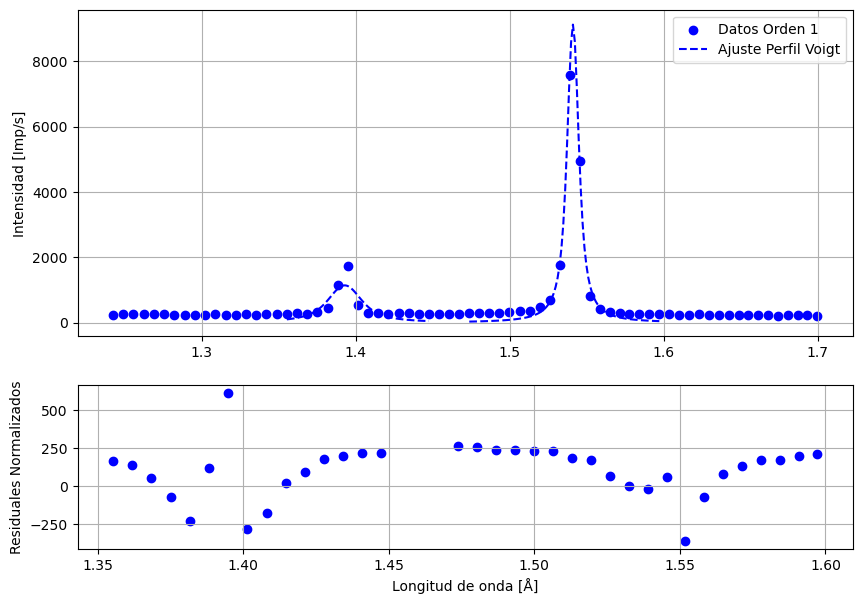

In [365]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx1 = np.linspace(orden1x_1[0],orden1x_1[-1],100)
plotx2 = np.linspace(orden1x_2[0],orden1x_2[-1],100)

axis[0].scatter(best_orden1x, best_orden1y, color = "#0000ff", label="Datos Orden 1")

axis[0].plot(plotx1, Voigt(plotx1,*params5), color = "#0000ff", label="Ajuste Perfil Voigt", linestyle="--")
axis[0].plot(plotx2, Voigt(plotx2,*params6), color = "#0000ff", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals11 = orden1y_1 - Voigt(orden1x_1, *params5)
residuals12 = orden1y_2 - Voigt(orden1x_2, *params6)

axis[1].scatter(orden1x_1,residuals11, color = "#0000ff")
axis[1].scatter(orden1x_2,residuals12, color = "#0000ff")
axis[1].grid()

axis[1].set_xlabel("Longitud de onda [Å]")
axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_ylabel("Residuales Normalizados")

In [30]:
cut = 20

In [32]:
params7, pcov7 = sc.optimize.curve_fit(Voigt,orden2x_1[cut:len(orden2x_1)-cut],
                                       orden2y_1[cut:len(orden2x_1)-cut],maxfev = 10000)
inc7 = np.sqrt(np.diag(pcov7))
params7, inc7

(array([6.65245748e+00, 1.39008283e+00, 1.02365866e-03, 4.82525838e-03]),
 array([1.88127420e+00, 5.89715658e-04, 7.13554127e-03, 3.73745576e-03]))

In [128]:
cut1=10

In [129]:
params8, pcov8 = sc.optimize.curve_fit(Voigt,orden2x_2[cut1:len(orden2x_2)-cut1],
                                       orden2y_2[cut1:len(orden2x_2)-cut1],maxfev = 10000)
inc8 = np.sqrt(np.diag(pcov8))
params8, inc8

(array([1.78544744e+01, 1.53968523e+00, 2.89983178e-07, 3.57519856e-03]),
 array([2.69850163e+00, 4.19217208e-04, 3.35466407e+00, 6.29867990e-04]))

Text(0, 0.5, 'Residuales Normalizados')

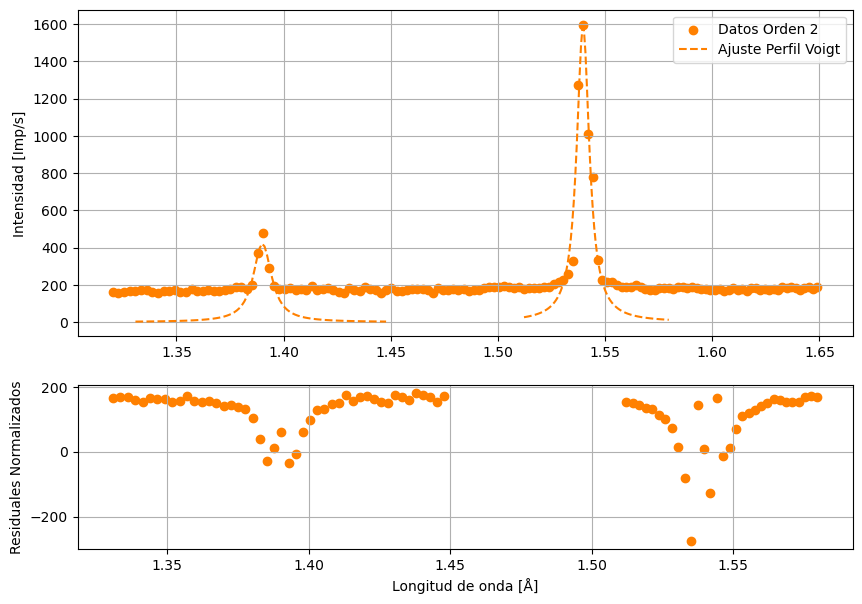

In [366]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plotx12 = np.linspace(orden2x_1[0],orden2x_1[-1],100)
plotx22 = np.linspace(orden2x_2[0],orden2x_2[-1],100)

axis[0].scatter(best_orden2x, best_orden2y, color = "#ff8000", label="Datos Orden 2")

axis[0].plot(plotx12, Voigt(plotx12,*params7), color = "#ff8000", label="Ajuste Perfil Voigt", linestyle="--")
axis[0].plot(plotx22, Voigt(plotx22,*params8), color = "#ff8000", linestyle="--")

axis[0].legend()
axis[0].grid()

residuals21 = orden2y_1 - Voigt(orden2x_1, *params7)
residuals22 = orden2y_2 - Voigt(orden2x_2, *params8)

axis[1].scatter(orden2x_1,residuals21, color = "#ff8000")
axis[1].scatter(orden2x_2,residuals22, color = "#ff8000")
axis[1].grid()

axis[1].set_xlabel("Longitud de onda [Å]")
axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_ylabel("Residuales Normalizados")

In [410]:
k_alpha_1 = params6[1]
k_alpha_2 = params8[1]
sigma_k_alpha_1 = inc6[1]
sigma_k_alpha_2 = inc8[1]
k_alpha_1, sigma_k_alpha_1

(1.5410914249664414, 0.0003209874751275139)

In [411]:
k_alpha_2, sigma_k_alpha_2

(1.5396852261404457, 0.0004192172084125729)

In [412]:
energy_alpha1 = hc/k_alpha_1
sigma_energy_alpha1 = hc*sigma_k_alpha_1/k_alpha_1**2
energy_alpha1, sigma_energy_alpha1

(80.45219835202177, 0.016757051268412412)

In [413]:
energy_alpha2 = hc/k_alpha_2
sigma_energy_alpha2 = hc*sigma_k_alpha_2/k_alpha_2**2
energy_alpha2, sigma_energy_alpha2

(80.52567556993012, 0.021925097639979133)

In [417]:
k_beta_1 = params5[1]
k_beta_2 = params7[1]
sigma_k_beta_1 = inc5[1]
sigma_k_beta_2 = inc7[1]
k_beta_1, sigma_k_beta_1

(1.3928133690433857, 0.0023873659373121222)

In [420]:
k_beta_2, sigma_k_beta_2

(1.3900828332212953, 0.0005897156577247465)

In [418]:
energy_beta1 = hc/k_beta_1
sigma_energy_beta1 = hc*sigma_k_beta_1/k_beta_1**2
energy_beta1, sigma_energy_beta1

(89.01708998180784, 0.15258064948585112)

In [419]:
energy_beta2 = hc/k_beta_2
sigma_energy_beta2 = hc*sigma_k_beta_2/k_beta_2**2
energy_beta2, sigma_energy_beta2

(89.19194600273309, 0.037837951698795246)

# Actividad 2 - Absorción de rayos X

Se realizaron mediciones de la intensidad del haz con y sin el material (aluminio y zinc), incrementando progresivamente su espesor. Los datos se graficaron en una escala logarítmica de la intensidad normalizada y el espesor para obtener el coeficiente de atenuación ($\mu$) mediante regresión para cada longitud de onda. Además, se graficó $\left(\frac{\mu}{\rho}\right)$ contra $\lambda^3$. Se compararon los coeficientes de atenuación de Al y Zn, analizando la influencia del número atómico.

In [138]:
def longitud_onda(ang_array,d,fase):
    new_array = []
    for i in range(len(ang_array)):
        new_array.append(2 * d * np.sin((ang_array[i] - fase) * np.pi / 180))
    return np.array(new_array)

In [139]:
act2_ang = DataFrame2["theta/°"].to_numpy()[0:9] + calibre
act2_long = longitud_onda(act2_ang,d,best_fase)

act2_sin_material = DataFrame2["R(30kV)/Imp/s"].to_numpy()[0:9]

act2_Zn_0025 = DataFrame2["R(30kV)/Imp/s.1"].to_numpy()[0:9]
act2_Zn_005 = DataFrame2["R(30kV)/Imp/s.2"].to_numpy()[0:9]
act2_Zn_0075 = DataFrame2["R(30kV)/Imp/s.3"].to_numpy()[0:9]
act2_Zn_01 = DataFrame2["R(30kV)/Imp/s.4"].to_numpy()[0:9]

act2_Al_002 = DataFrame2["R(30kV)/Imp/s.5"].to_numpy()[0:9]
act2_Al_004 = DataFrame2["R(30kV)/Imp/s.6"].to_numpy()[0:9]
act2_Al_006 = DataFrame2["R(30kV)/Imp/s.7"].to_numpy()[0:9]
act2_Al_008 = DataFrame2["R(30kV)/Imp/s.8"].to_numpy()[0:9]
act2_Al_01 = DataFrame2["R(30kV)/Imp/s.9"].to_numpy()[0:9]

Los siguientes datos son para el aluminio

Text(0, 0.5, 'Intensidad')

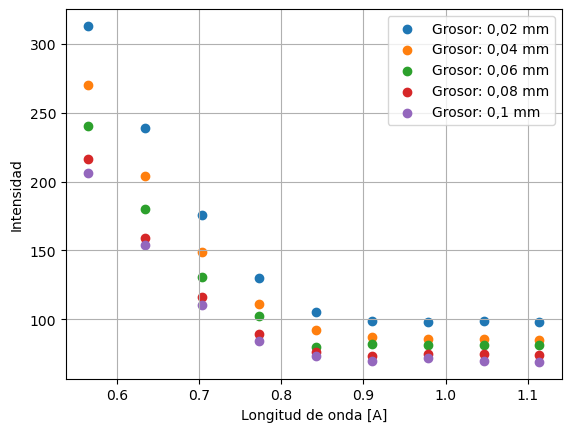

In [140]:
plt.scatter(act2_long,act2_Al_002,label="Grosor: 0,02 mm")
plt.scatter(act2_long,act2_Al_004,label="Grosor: 0,04 mm")
plt.scatter(act2_long,act2_Al_006,label="Grosor: 0,06 mm")
plt.scatter(act2_long,act2_Al_008,label="Grosor: 0,08 mm")
plt.scatter(act2_long,act2_Al_01,label="Grosor: 0,1 mm")
plt.legend()
plt.grid()
plt.xlabel("Longitud de onda [A]")
plt.ylabel("Intensidad")

Los siguientes datos son para el zinc

Text(0, 0.5, 'Intensidad')

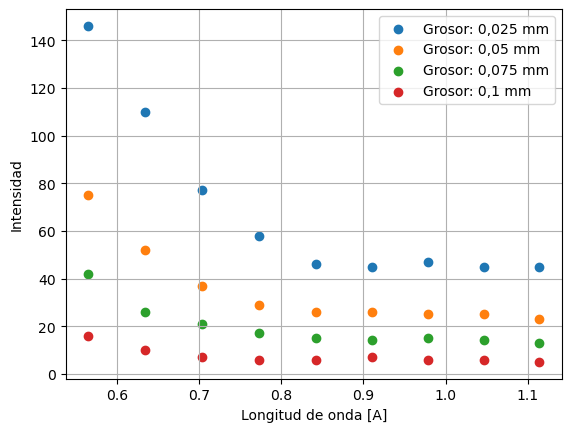

In [141]:
plt.scatter(act2_long,act2_Zn_0025,label="Grosor: 0,025 mm")
plt.scatter(act2_long,act2_Zn_005,label="Grosor: 0,05 mm")
plt.scatter(act2_long,act2_Zn_0075,label="Grosor: 0,075 mm")
plt.scatter(act2_long,act2_Zn_01,label="Grosor: 0,1 mm")
plt.legend()
plt.grid()
plt.xlabel("Longitud de onda [A]")
plt.ylabel("Intensidad")

In [253]:
grosor = np.array([0.02, 0.04, 0.06, 0.08, 0.1])/1000

result = {}
for i, angle in enumerate(act2_long):
    result[angle] = np.log(np.array([act2_Al_002[i],
                     act2_Al_004[i],
                     act2_Al_006[i],
                     act2_Al_008[i],
                     act2_Al_01[i]])/act2_sin_material[i])

In [254]:
result

{0.5648328938086835: array([0.8368984 , 0.72192513, 0.64171123, 0.57754011, 0.55080214]),
 0.6343505731101579: array([0.79401993, 0.67774086, 0.59800664, 0.5282392 , 0.51162791]),
 0.7036750230819707: array([0.78571429, 0.66517857, 0.58482143, 0.51785714, 0.49107143]),
 0.7727851268250999: array([0.78787879, 0.67272727, 0.61818182, 0.53939394, 0.50909091]),
 0.8416598327324604: array([0.78358209, 0.68656716, 0.59701493, 0.56716418, 0.54477612]),
 0.9102781609014289: array([0.73880597, 0.64925373, 0.6119403 , 0.54477612, 0.52238806]),
 0.9786192095245241: array([0.72592593, 0.63703704, 0.6       , 0.55555556, 0.53333333]),
 1.0466621612563012: array([0.73880597, 0.64179104, 0.60447761, 0.55970149, 0.52238806]),
 1.1143862895545154: array([0.72058824, 0.625     , 0.59558824, 0.54411765, 0.50735294])}

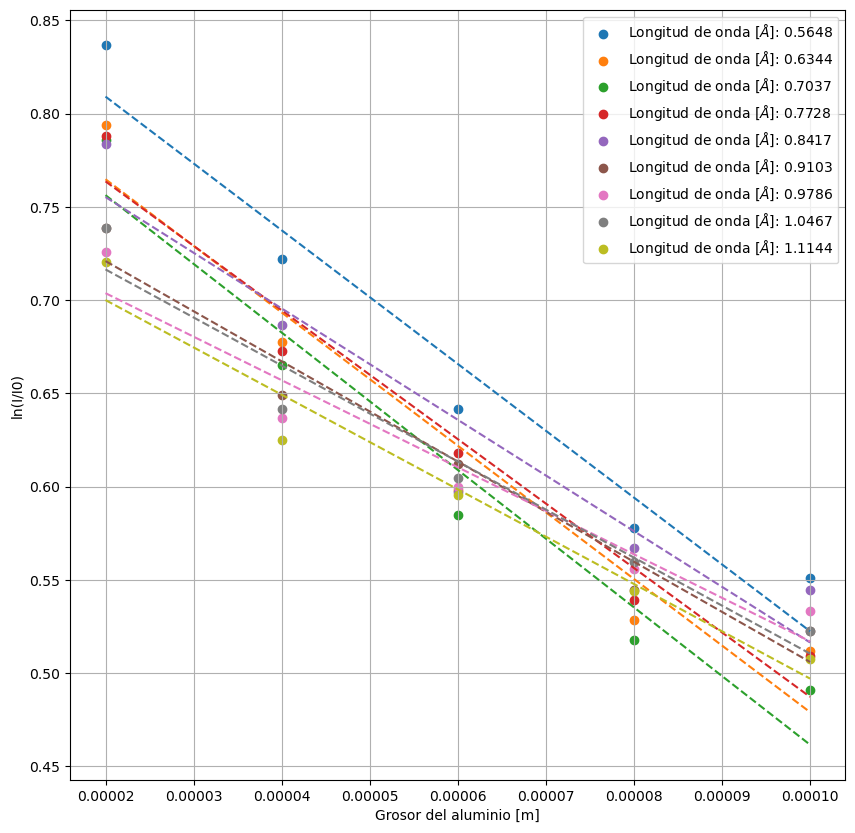

In [490]:
def Linear(x, a, b):
    return a*x + b

params_abs = []
pcov_abs = []

plt.figure(figsize = (10, 10))

for i in range(0, 9):
    param, pcov = sc.optimize.curve_fit(Linear,grosor,result[act2_long[i]])
    params_abs.append(param)
    pcov_abs.append(pcov)
    
    plt.plot(grosor,Linear(grosor,*param),linestyle="--")
    plt.scatter(grosor, result[act2_long[i]],label="Longitud de onda [$\AA$]: {0}".format(round(act2_long[i],4)))
    plt.legend()

plt.xlabel("Grosor del aluminio [m]")
plt.ylabel("ln(I/I0)")
plt.grid()    

Es posible notar que algunos datos no tienen una tendencia lineal esperada, lo que hará que el coeficiente de atenuación no sea adecuadamente estimado.

A continuación, el valor absoluto del primer número de cada array corresponde a la atenuación en unidades de 1/m para el aluminio. Es posible analizar que la tendencia es crecuente y luego decreciente, llegando a un máximo en aproximadamente 0.7 Ángstroms.

In [270]:
params_abs

[array([-3.58288770e+03,  8.80748663e-01]),
 array([-3.57142857e+03,  8.36212625e-01]),
 array([-3.68303572e+03,  8.29910714e-01]),
 array([-3.45454546e+03,  8.32727273e-01]),
 array([-2.98507463e+03,  8.14925373e-01]),
 array([-2.68656716e+03,  7.74626865e-01]),
 array([-2.33333332e+03,  7.50370369e-01]),
 array([-2.57462687e+03,  7.67910448e-01]),
 array([-2.53676469e+03,  7.50735293e-01])]

In [271]:
def cubic(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

In [272]:
mu_al = []
for i in params_abs:
    mu_al.append(-i[0])

mu_al = np.array(mu_al)
mu_al

array([3582.88770041, 3571.42857178, 3683.03571564, 3454.54546043,
       2985.07462687, 2686.56715835, 2333.33331855, 2574.62687323,
       2536.76468915])

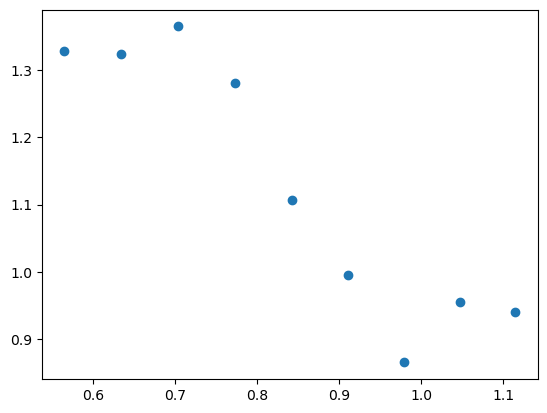

In [273]:
rho_al = 2698
plt.scatter(act2_long**3,mu_al/rho_al)

In [274]:
grosor1 = np.array([0.025, 0.05, 0.075, 0.1])/1000

result1 = {}
for i, long in enumerate(act2_long):
    result1[long] = np.log(np.array([act2_Zn_0025[i],
                     act2_Zn_005[i],
                     act2_Zn_0075[i],
                     act2_Zn_01[i]])/act2_sin_material[i])

In [275]:
result1

{0.5648328938086835: array([-0.94064918, -1.60676768, -2.18658618, -3.15166708]),
 0.6343505731101579: array([-1.0066299 , -1.75586655, -2.44901373, -3.40452517]),
 0.7036750230819707: array([-1.06784063, -1.80072814, -2.36712361, -3.4657359 ]),
 0.7727851268250999: array([-1.04550246, -1.73864964, -2.27273213, -3.314186  ]),
 0.8416598327324604: array([-1.0691984 , -1.63974326, -2.1897896 , -3.10608033]),
 0.9102781609014289: array([-1.09117731, -1.63974326, -2.25878247, -2.95192965]),
 0.9786192095245241: array([-1.05512718, -1.68639895, -2.19722458, -3.11351531]),
 1.0466621612563012: array([-1.09117731, -1.67896398, -2.25878247, -3.10608033]),
 1.1143862895545154: array([-1.1059924 , -1.77716067, -2.34770553, -3.30321697])}

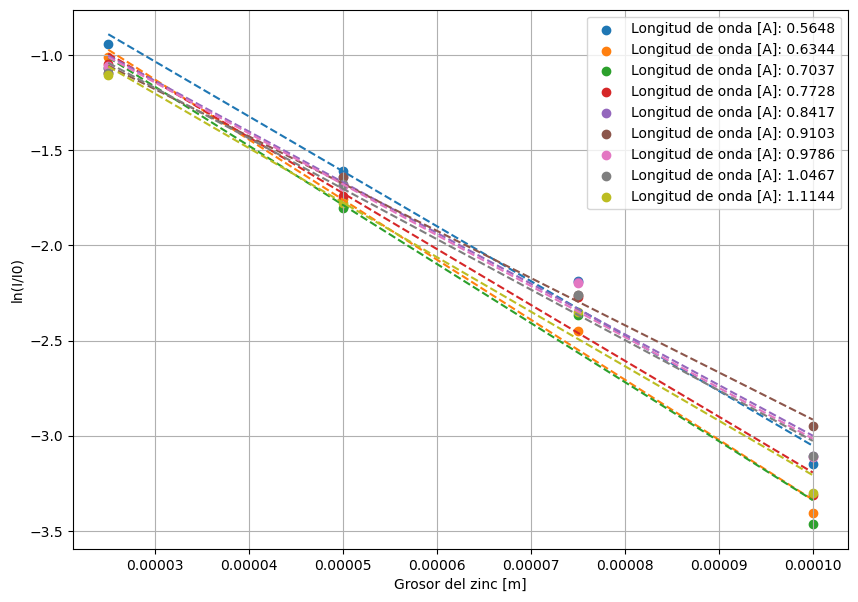

In [492]:
params_abs1 = []
pcov_abs1 = []

plt.figure(figsize = (10,7))

for i in range(0, 9):
    param, pcov = sc.optimize.curve_fit(Linear,grosor1,result1[act2_long[i]])
    params_abs1.append(param)
    pcov_abs1.append(pcov)
    
    plt.plot(grosor1,Linear(grosor1,*param),linestyle="--")
    plt.scatter(grosor1, result1[act2_long[i]],label="Longitud de onda [A]: {0}".format(round(act2_long[i],4)))
    plt.ylabel("$\ln{(I/I_0)}$")
    plt.xlabel("d [m]")

plt.xlabel("Grosor del zinc [m]")
plt.ylabel("ln(I/I0)")
plt.grid()  
plt.legend()

A continuación, el valor absoluto del primer número de cada array corresponde a la atenuación en unidades de 1/m para el zinc. Es posible analizar que la tendencia es crecuente y luego decreciente.

In [307]:
mu_zn = []
for i in params_abs1:
    mu_zn.append(-i[0])

mu_zn = np.array(mu_zn)
mu_zn

array([28851.48874119, 31547.33196471, 31040.32526241, 29360.53241929,
       26642.76850637, 24805.1849224 , 26743.96013345, 26498.11029951,
       28648.87439254])

In [280]:
tabla = {"λ [Å]": act2_long, "µ Aluminio [1/m]": mu_al, "µ Zinc [1/m]": mu_zn }

pd.DataFrame(tabla)

,λ [Å],µ Aluminio [1/m],µ Zinc [1/m]
0,0.564833,3582.887700,28851.488741
1,0.634351,3571.428572,31547.331965
2,0.703675,3683.035716,31040.325262
3,0.772785,3454.545460,29360.532419
4,0.841660,2985.074627,26642.768506
5,0.910278,2686.567158,24805.184922
6,0.978619,2333.333319,26743.960133
7,1.046662,2574.626873,26498.110300
8,1.114386,2536.764689,28648.874393


In [507]:
p, _ = sc.optimize.curve_fit(cubic,act2_long**3,mu_zn/rho_zn)
p

array([ 5.44539365, -9.26842731,  2.08501685, 11.18871826])

Text(0, 0.5, 'μ/p')

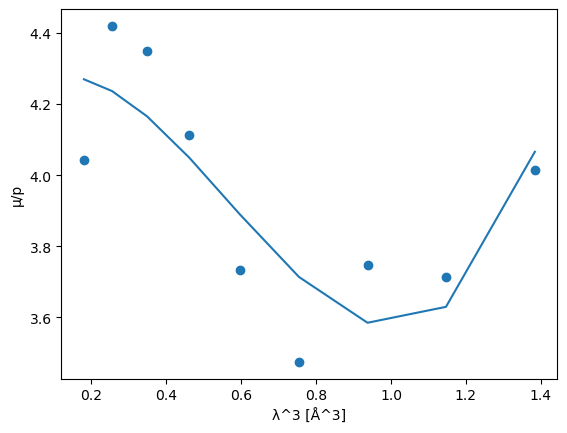

In [499]:
rho_zn = 7138
plt.scatter(act2_long**3,mu_zn/rho_zn)
plt.plot(act2_long**3, cubic(act2_long**3,*p))
plt.xlabel("λ^3 [Å^3]")
plt.ylabel("μ/p")

In [504]:
p1, _ = sc.optimize.curve_fit(cubic,act2_long**3,mu_al/rho_zn)

In [506]:
p1

array([ 1.00382559, -1.92820521,  0.48990607,  1.32419845])

Text(0, 0.5, 'μ/p')

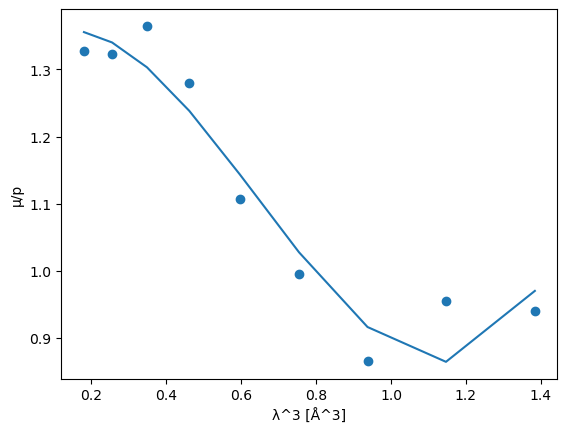

In [505]:
rho_zn = 2698
plt.scatter(act2_long**3,mu_al/rho_zn)
plt.plot(act2_long**3, cubic(act2_long**3,*p1))
plt.xlabel("λ^3 [Å^3]")
plt.ylabel("μ/p")

# Actividad 3 - Dependencia de la intensidad del voltaje y corriente del ánodo

Se seleccionó un rango de medición entre $17^\circ$ y $22^\circ$ para observar el espectro característico. Con un tiempo de integración de 2s y resolución de $0.1^\circ$, se realizaron mediciones con corriente constante de $1 \, \text{mA}$, variando el voltaje entre $35 \, \text{kV}$ y $11 \, \text{kV}$ en pasos de 2 kV. Luego, con voltaje constante de $35 \, \text{kV}$, variando la corriente entre $1 \, \text{mA}$ y $0.1 \, \text{mA}$ en pasos de $0.1 \, \text{mA}$. Por ahora, solo se graficó la intensidad en función de la longitud de onda para cada caso.

In [281]:
DataFrame31

,theta/°,R(11kV)/Imp/s,R(13kV)/Imp/s,R(15kV)/Imp/s,R(17kV)/Imp/s,R(19kV)/Imp/s,R(21kV)/Imp/s,R(23kV)/Imp/s,R(25kV)/Imp/s,R(27kV)/Imp/s,R(29kV)/Imp/s,R(31kV)/Imp/s,R(33kV)/Imp/s,R(35kV)/Imp/s
0,17.0,6,13,18,27,45,61,71,87,111,141,155,189,234
1,17.1,6,11,17,31,47,74,79,98,119,140,178,203,228
2,17.2,3,19,24,30,48,62,84,96,108,135,176,183,229
3,17.3,8,17,24,36,54,66,76,93,135,138,169,204,243
4,17.4,8,11,20,32,44,61,89,103,116,140,175,227,256
5,17.5,5,12,30,39,55,77,85,115,140,153,186,216,249
6,17.6,7,12,23,39,56,70,84,109,124,159,174,228,253
7,17.7,4,13,31,43,54,88,104,117,124,182,204,237,271
8,17.8,5,13,22,43,60,69,87,111,128,178,206,231,281
9,17.9,4,18,34,42,60,87,94,130,165,189,226,244,300


In [282]:
DataFrame32

,theta/°,R(35kV)/Imp/s,theta/°.1,R(35kV)/Imp/s.1,theta/°.2,R(35kV)/Imp/s.2,theta/°.3,R(35kV)/Imp/s.3,theta/°.4,R(35kV)/Imp/s.4,theta/°.5,R(35kV)/Imp/s.5,theta/°.6,R(35kV)/Imp/s.6,theta/°.7,R(35kV)/Imp/s.7,theta/°.8,R(35kV)/Imp/s.8,theta/°.9,R(35kV)/Imp/s.9
0,17.0,238,17.0,192,17.0,194,17.0,148,17.0,128,17.0,123,17.0,84,17.0,67,17.0,38,17.0,22
1,17.1,239,17.1,221,17.1,182,17.1,157,17.1,140,17.1,116,17.1,95,17.1,73,17.1,47,17.1,23
2,17.2,237,17.2,214,17.2,201,17.2,165,17.2,137,17.2,114,17.2,91,17.2,75,17.2,42,17.2,19
3,17.3,265,17.3,221,17.3,181,17.3,177,17.3,153,17.3,121,17.3,90,17.3,69,17.3,47,17.3,25
4,17.4,260,17.4,208,17.4,206,17.4,189,17.4,147,17.4,128,17.4,98,17.4,77,17.4,52,17.4,22
5,17.5,252,17.5,226,17.5,201,17.5,168,17.5,157,17.5,129,17.5,107,17.5,85,17.5,49,17.5,23
6,17.6,260,17.6,235,17.6,202,17.6,187,17.6,157,17.6,127,17.6,121,17.6,80,17.6,46,17.6,27
7,17.7,278,17.7,265,17.7,200,17.7,201,17.7,166,17.7,136,17.7,109,17.7,78,17.7,51,17.7,20
8,17.8,288,17.8,240,17.8,219,17.8,178,17.8,166,17.8,121,17.8,120,17.8,92,17.8,46,17.8,25
9,17.9,329,17.9,270,17.9,239,17.9,223,17.9,176,17.9,155,17.9,116,17.9,86,17.9,54,17.9,27


In [283]:
act3_ang = DataFrame32["theta/°"].to_numpy() + calibre
act3_long = longitud_onda(act3_ang,d,best_fase)

act3_01 = DataFrame32["R(35kV)/Imp/s"].to_numpy()
act3_02 = DataFrame32["R(35kV)/Imp/s.1"].to_numpy()
act3_03 = DataFrame32["R(35kV)/Imp/s.2"].to_numpy()
act3_04 = DataFrame32["R(35kV)/Imp/s.3"].to_numpy()
act3_05 = DataFrame32["R(35kV)/Imp/s.4"].to_numpy()
act3_06 = DataFrame32["R(35kV)/Imp/s.5"].to_numpy()
act3_07 = DataFrame32["R(35kV)/Imp/s.6"].to_numpy()
act3_08 = DataFrame32["R(35kV)/Imp/s.7"].to_numpy()
act3_09 = DataFrame32["R(35kV)/Imp/s.8"].to_numpy()
act3_1 = DataFrame32["R(35kV)/Imp/s.9"].to_numpy()

Text(0, 0.5, 'Intensidad [Imp/s]')

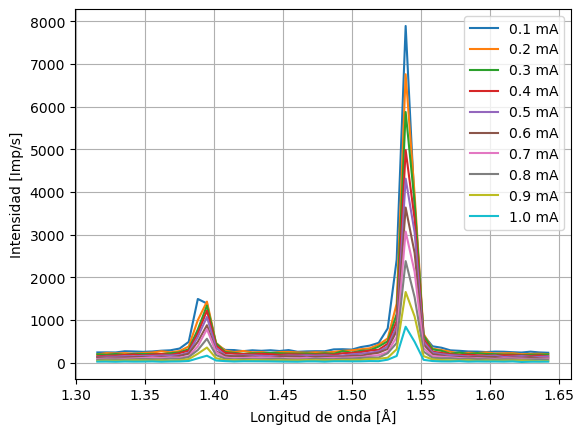

In [427]:
plots1 = [act3_01,act3_02,act3_03,act3_04,act3_05,act3_06,act3_07,act3_08,act3_09,act3_1]
k_alpha = []
k_beta = []

maximum_orden11 = []
maximum_orden21 = []

for i in range(0,len(plots1)):
    plt.plot(act3_long, plots1[i], label = "{:.1f} mA".format(0.1 * (i+1)))
    
    orden1x, orden1y = [], []
    orden2x, orden2y = [], []

    for j in range(len(act3_long)):
        if 1.37 <= act3_long[j] <= 1.44:
        
            orden1x.append(act3_long[j])
            orden1y.append(plots1[i][j])
        
        if 1.51 <= act3_long[j] <= 1.56:
        
            orden2x.append(act3_long[j])
            orden2y.append(plots1[i][j])
            
    params_alpha, pcov_alpha = sc.optimize.curve_fit(Lorentzian,orden1x,orden1y, maxfev = 10000)
    params_beta, pcov_beta = sc.optimize.curve_fit(Lorentzian,orden2x,orden2y, maxfev = 10000)
    
    k_alpha.append([ params_alpha[2], np.sqrt(np.diag(pcov_alpha))[2] ])
    k_beta.append([ params_beta[2], np.sqrt(np.diag(pcov_beta))[2] ])
    
    maximum_orden11.append(Lorentzian(params_alpha[2],*params_alpha))
    maximum_orden21.append(Lorentzian(params_beta[2],*params_beta))
    
    #plotx1_ = np.linspace(orden2x[0],orden2x[-1],200)
    #plt.plot(plotx1_, Lorentzian(plotx1_,*params_beta))
    
plt.legend()
plt.grid()
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Intensidad [Imp/s]")

In [428]:
maximum_orden21[::-1]

[1507.8367720192136,
 3590.984813831168,
 4418.298910814412,
 6454.841527154648,
 7388.845630897016,
 9729.800343244327,
 10445.454193299449,
 11313.744663337027,
 10644.387160422637,
 8257.964090758802]

In [287]:
def linear(x,m,b):
    return m*x+b

In [288]:
pa2, pc2 = sc.optimize.curve_fit(linear,plot_2[0:8],maximum_orden21[::-1][0:8])
pa1, pc1 = sc.optimize.curve_fit(linear,plot_2[0:8],maximum_orden11[::-1][0:8])

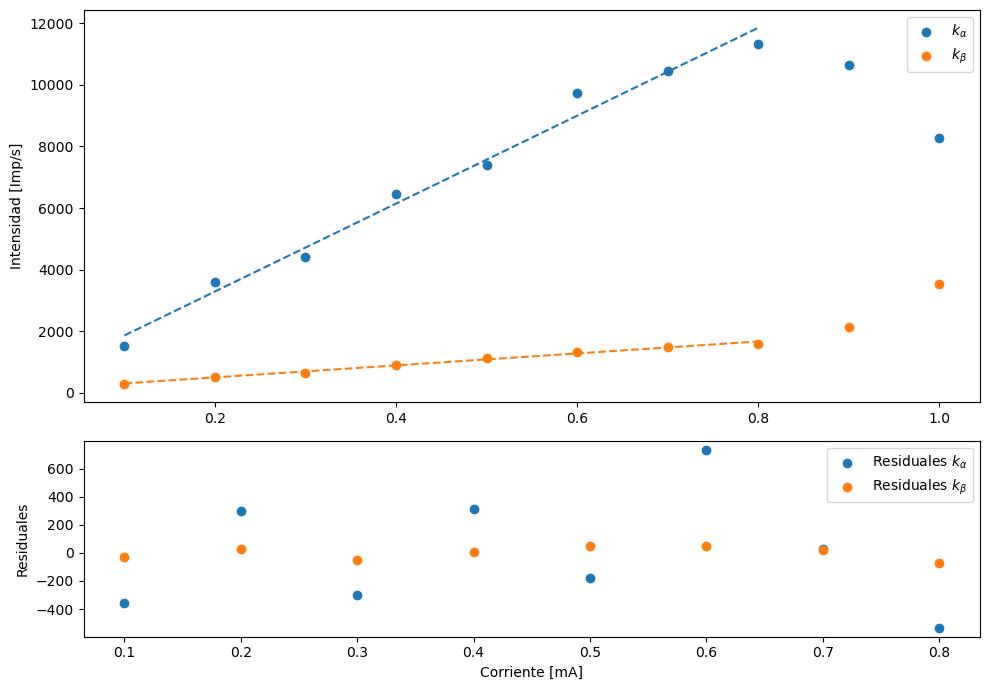

In [475]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plot_2 = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

axis[0].scatter(plot_2,maximum_orden21[::-1],label="$k_α$")
axis[0].plot(plot_2[0:8], linear(plot_2[0:8],*pa2),linestyle="--")

axis[0].scatter(plot_2,maximum_orden11[::-1],label="$k_β$")
axis[0].plot(plot_2[0:8], linear(plot_2[0:8],*pa1),linestyle="--")

axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_xlabel("Corriente [mA]")
axis[0].legend()

residuals_orden11 = maximum_orden11[::-1][0:8] - linear(plot_2[0:8],*pa1)
residuals_orden21 = maximum_orden21[::-1][0:8] - linear(plot_2[0:8],*pa2)

axis[1].scatter(plot_2[0:8],residuals_orden21, label = "Residuales $k_α$")
axis[1].scatter(plot_2[0:8],residuals_orden11, label = "Residuales $k_β$")
axis[1].set_ylabel("Residuales")
axis[1].legend()
plt.tight_layout()

In [453]:
pa2[0]/(35-9.979)**(3/2)

113.93470792880281

In [454]:
pa1[0]/(35-9.979)**(3/2)

15.513173862725264

In [455]:
maximum_orden11

[3523.5961939063495,
 2150.9839330915433,
 1602.2176398579104,
 1494.5002610069673,
 1330.8904089366135,
 1138.4928546717701,
 899.7379327215133,
 652.7478658810923,
 531.2342519555145,
 285.09646495829764]

In [456]:
k_alpha

[[1.3914623032645494, 3.797255508633701e-05],
 [1.3923340692963804, 9.104861795452091e-05],
 [1.3929874295291789, 0.00014658338432143775],
 [1.3929714111533957, 0.00013621369251698223],
 [1.3929336353190072, 0.00019274944859954112],
 [1.3928585206894757, 0.00010566339310132468],
 [1.3933455233745555, 0.0002537202917289334],
 [1.3931738788945687, 0.00016165095868758765],
 [1.3925827251923615, 0.00018026985228823458],
 [1.3924013511690994, 0.0001838543469495611]]

In [457]:
k_beta

[[1.5399117332405012, 0.000304089302547992],
 [1.5412733597499684, 0.00018642752907198882],
 [1.541514758235954, 0.00013689000753117853],
 [1.5416148502906488, 0.00013079767821333306],
 [1.5416947121964983, 0.00011432211830177256],
 [1.541660898724699, 0.00012398229777229905],
 [1.5416488399997421, 0.00012070157478176648],
 [1.5415101820128398, 0.00014086685237042686],
 [1.541590477027705, 0.00015829880472687167],
 [1.5413679263379256, 0.00020094256999068108]]

In [458]:
act3_ang1 = DataFrame31["theta/°"].to_numpy() + calibre
act3_long1 = longitud_onda(act3_ang,d,best_fase)

act3_11 = DataFrame31["R(11kV)/Imp/s"].to_numpy()
act3_13 = DataFrame31["R(13kV)/Imp/s"].to_numpy()
act3_15 = DataFrame31["R(15kV)/Imp/s"].to_numpy()
act3_17 = DataFrame31["R(17kV)/Imp/s"].to_numpy()
act3_19 = DataFrame31["R(19kV)/Imp/s"].to_numpy()
act3_21 = DataFrame31["R(21kV)/Imp/s"].to_numpy()
act3_23 = DataFrame31["R(23kV)/Imp/s"].to_numpy()
act3_25 = DataFrame31["R(25kV)/Imp/s"].to_numpy()
act3_27 = DataFrame31["R(27kV)/Imp/s"].to_numpy()
act3_29 = DataFrame31["R(29kV)/Imp/s"].to_numpy()
act3_31 = DataFrame31["R(31kV)/Imp/s"].to_numpy()
act3_33 = DataFrame31["R(33kV)/Imp/s"].to_numpy()
act3_35 = DataFrame31["R(35kV)/Imp/s"].to_numpy()

Text(0, 0.5, 'Intensidad')

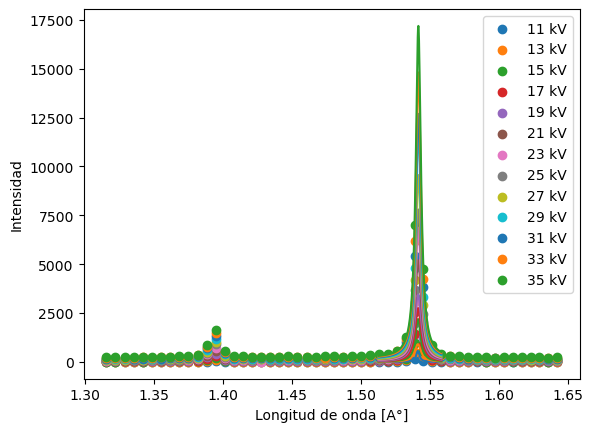

In [459]:
plots2 = [act3_11,act3_13,act3_15,act3_17,act3_19,act3_21,act3_23,act3_25,act3_27,act3_29,act3_31,act3_33,act3_35]
k_alpha1 = []
k_beta1 = []

maximum_orden12 = []
maximum_orden22 = []

for i in range(0,len(plots2)):
    plt.scatter(act3_long1, plots2[i], label = "{0} kV".format(10 + 2*i+1))
    
    orden1x, orden1y = [], []
    orden2x, orden2y = [], []

    for j in range(len(act3_long1)):
        if 1.35 <= act3_long1[j] <= 1.42:
        
            orden1x.append(act3_long1[j])
            orden1y.append(plots2[i][j])
        
        if 1.51 <= act3_long1[j] <= 1.56:
        
            orden2x.append(act3_long1[j])
            orden2y.append(plots2[i][j])
            
    params_alpha, pcov_alpha = sc.optimize.curve_fit(Lorentzian,orden1x,orden1y, maxfev = 10000)
    params_beta, pcov_beta = sc.optimize.curve_fit(Lorentzian,orden2x,orden2y, maxfev = 10000)
    
    k_alpha1.append([ params_alpha[2], np.sqrt(np.diag(pcov_alpha))[2] ])
    k_beta1.append([ params_beta[2], np.sqrt(np.diag(pcov_beta))[2] ])
    
    maximum_orden12.append(Lorentzian(params_alpha[2],*params_alpha))
    maximum_orden22.append(Lorentzian(params_beta[2],*params_beta))
    
    plotx2 = np.linspace(orden2x[0],orden2x[-1],200)
    plt.plot(plotx2, Lorentzian(plotx2,*params_beta))
    
plt.legend()
plt.xlabel("Longitud de onda [A°]")
plt.ylabel("Intensidad")

In [460]:
maximum_orden22

[563.0683108841454,
 908.4056761976874,
 2195.931610481647,
 2759.221688837902,
 3444.8523246875925,
 5203.184636160458,
 6871.57310349661,
 7801.730988816498,
 9559.483650438511,
 11919.784401997724,
 12687.66447468545,
 14805.370139440367,
 17187.039400435693]

In [461]:
def model(x,a,b, c):
    return a*x**b+ c

In [174]:
params_1, pcov_1 = sc.optimize.curve_fit(model,plot_1,maximum_orden22)
params_2, pcov_2 = sc.optimize.curve_fit(model,plot_1,maximum_orden12)

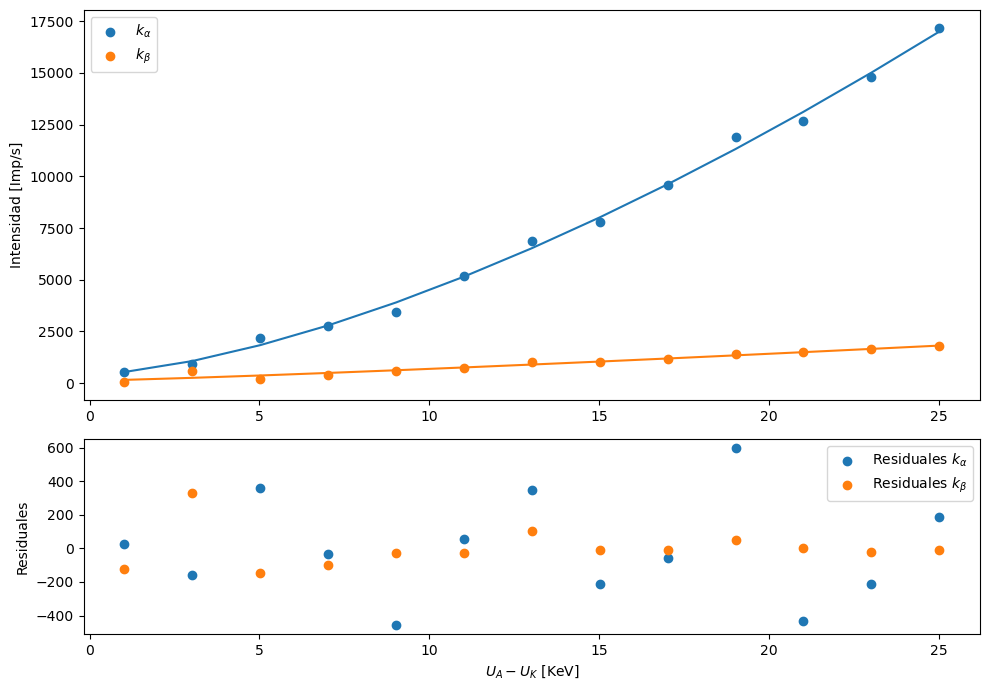

In [489]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plot_1 = np.array([11,13,15,17,19,21,23,25,27,29,31,33,35])-9.979

axis[0].scatter(plot_1,maximum_orden22,label="$k_α$")
axis[0].plot(plot_1,model(plot_1,*params_1))

axis[0].scatter(plot_1,maximum_orden12,label="$k_β$")
axis[0].plot(plot_1,model(plot_1,*params_2))

axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_xlabel("$U_A - U_K$ [KeV]")
axis[0].legend()

residuals_orden22 = maximum_orden22 - model(plot_1,*params_1)
residuals_orden12 = maximum_orden12 - model(plot_1,*params_2)

axis[1].scatter(plot_1,residuals_orden22, label = "Residuales $k_α$")
axis[1].scatter(plot_1,residuals_orden12, label = "Residuales $k_β$")
axis[1].set_ylabel("Residuales")
axis[1].legend()
plt.tight_layout()

In [175]:
params_1[0] # R(35kV)/(Imp/s)/mA

120.90989512425216

In [176]:
params_2[0] # R(35kV)/(Imp/s)/mA

36.72695950275162

In [178]:
params_11, pcov_11 = sc.optimize.curve_fit(linear,plot_11,maximum_orden22)
params_21, pcov_21 = sc.optimize.curve_fit(linear,plot_11,maximum_orden12)

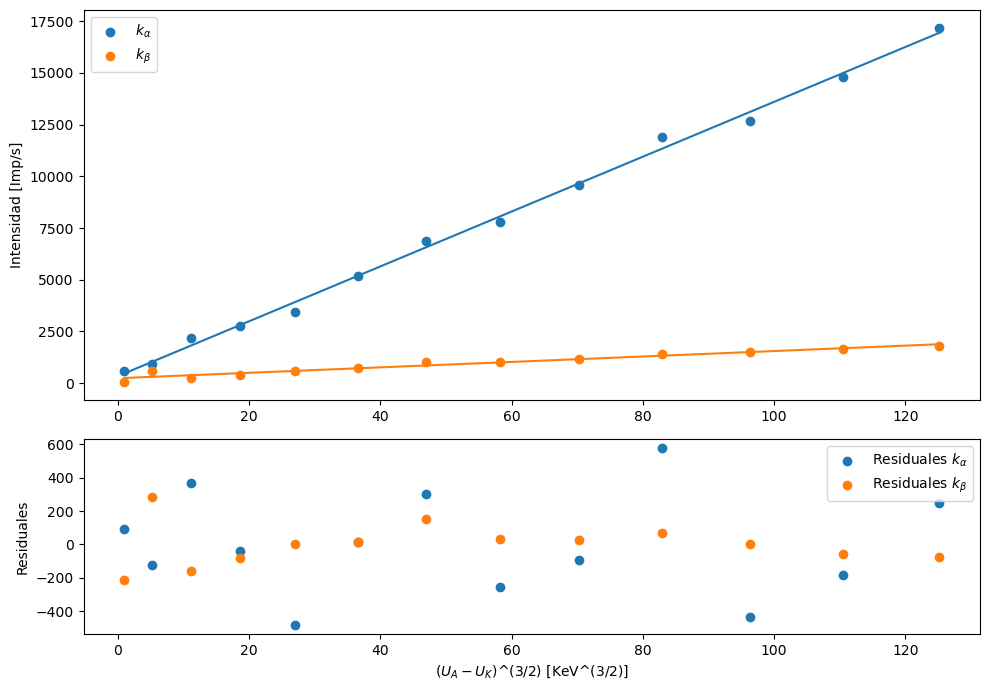

In [478]:
figure, axis = plt.subplots(2, 1, figsize = (10, 7), gridspec_kw={'height_ratios': [2, 1]})

plot_11 = (np.array([11,13,15,17,19,21,23,25,27,29,31,33,35])-9.979)**(3/2)

axis[0].scatter(plot_11,maximum_orden22,label="$k_α$")
axis[0].plot(plot_11,linear(plot_11,*params_11))

axis[0].scatter(plot_11,maximum_orden12,label="$k_β$")
axis[0].plot(plot_11,linear(plot_11,*params_21))

axis[0].set_ylabel("Intensidad [Imp/s]")
axis[1].set_xlabel("$(U_A - U_K)$^(3/2) [KeV^(3/2)]")
axis[0].legend()

residuals_orden22 = maximum_orden22 - linear(plot_11,*params_11)
residuals_orden12 = maximum_orden12 - linear(plot_11,*params_21)

axis[1].scatter(plot_11,residuals_orden22, label = "Residuales $k_α$")
axis[1].scatter(plot_11,residuals_orden12, label = "Residuales $k_β$")
axis[1].set_ylabel("Residuales")
axis[1].legend()
plt.tight_layout()


plt.tight_layout()

In [179]:
params_11[0], params_21[0]

(132.70315410477087, 13.14670170988297)

In [508]:
params_21[0], params_21[0]

(13.14670170988297, 13.14670170988297)

In [180]:
k_alpha1

[[1.3932365361394454, 0.0006769556115026766],
 [1.3921540140519735, 0.0001983252585428103],
 [1.3928888978174148, 0.000293449121777908],
 [1.3927781906623322, 0.0001240984691976139],
 [1.3925762094478995, 0.00012802513347246603],
 [1.3928259141773187, 0.0001553611859650628],
 [1.3926916768333413, 0.0001351608856268035],
 [1.3932371409811528, 0.00011892081037185205],
 [1.3932543484201638, 0.0001131585173710205],
 [1.3931440815098326, 0.0002389400931246408],
 [1.393302052859119, 0.00014815027631794834],
 [1.3934545647246046, 0.00021445896037985672],
 [1.3933624914486318, 0.00018758235738211408]]

In [181]:
k_beta1

[[1.541299277466791, 0.00010575115785171432],
 [1.5413544402536246, 0.0002473217466306128],
 [1.5414438691907986, 0.0001803368563037932],
 [1.541483325336416, 0.0001678563427809947],
 [1.541429605622824, 0.00017049019212108296],
 [1.5415446632560723, 0.0001345590124343166],
 [1.5416200919319714, 0.00014208998540760748],
 [1.5416152318067204, 0.00012241133153301562],
 [1.5416727902196767, 0.00010940265195394509],
 [1.5416850817190766, 0.00010496721240214718],
 [1.541701795729414, 8.96408966105423e-05],
 [1.5416810969803492, 0.000101707867444614],
 [1.5416639471665265, 8.28715530791317e-05]]

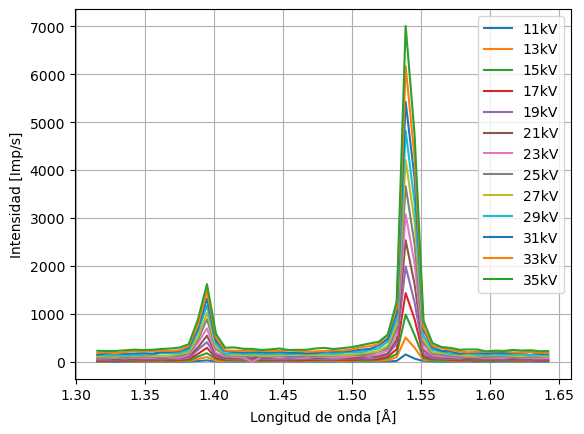

In [313]:
plt.plot(act3_long,act3_11,label="11kV")
plt.plot(act3_long,act3_13,label="13kV")
plt.plot(act3_long,act3_15,label="15kV")
plt.plot(act3_long,act3_17,label="17kV")
plt.plot(act3_long,act3_19,label="19kV")
plt.plot(act3_long,act3_21,label="21kV")
plt.plot(act3_long,act3_23,label="23kV")
plt.plot(act3_long,act3_25,label="25kV")
plt.plot(act3_long,act3_27,label="27kV")
plt.plot(act3_long,act3_29,label="29kV")
plt.plot(act3_long,act3_31,label="31kV")
plt.plot(act3_long,act3_33,label="33kV")
plt.plot(act3_long,act3_35,label="35kV")
plt.xlabel("Longitud de onda [Å]")
plt.ylabel("Intensidad [Imp/s]")

plt.grid()
plt.legend()

# Actividad 4 - Ley de Duane-Hunt

Se utilizó el diafragma/colimador de 2 mm, con un tiempo de exposición de 2s, corriente de $I_A = 1 \, \text{mA}$ y resolución angular de $0.1^\circ$. Se registró el espectro continuo en un rango de $10^\circ - 21^\circ$ para diferentes valores de alto voltaje entre $35 \, \text{kV}$ y $23 \, \text{kV}$, con pasos de 2 kV. La idea es determinar la longitud de onda mínima, $\lambda_{\text{min}}$, a partir de la cual comienza a producirse el fenómeno de Bremsstrahlung, y se graficará $\lambda_{\text{min}}$ en función de $1/U_A$. También se piensa hallar la pendiente de esta gráfica y se compararla con la ecuación $e U_A = \frac{hc}{\lambda_{\text{min}}}$, donde se obtendrá el valor de la constante de Planck, $h$, mediante una regresión lineal de los datos obtenidos. Esto no fue posible con las mediciones que se hicieron porque se filtró demasiado ruido.

In [183]:
DataFrame4

,theta/°,R(23kV)/Imp/s,R(25kV)/Imp/s,R(27kV)/Imp/s,R(29kV)/Imp/s,R(31kV)/Imp/s,R(33kV)/Imp/s,R(35kV)/Imp/s
0,10.0,3,2,3,3,4,9,8
1,10.1,1,4,3,3,1,4,14
2,10.2,3,3,4,6,2,4,10
3,10.3,2,1,3,3,4,6,7
4,10.4,3,5,5,4,5,4,9
...,...,...,...,...,...,...,...,...
106,20.6,4,3,5,6,10,10,8
107,20.7,4,5,3,5,8,6,9
108,20.8,6,5,5,6,7,9,9
109,20.9,5,3,4,5,6,9,11


In [184]:
act4_ang = DataFrame4["theta/°"].to_numpy() + calibre
act4_23 = DataFrame4["R(23kV)/Imp/s"].to_numpy()
act4_25 = DataFrame4["R(25kV)/Imp/s"].to_numpy()
act4_27 = DataFrame4["R(27kV)/Imp/s"].to_numpy()
act4_29 = DataFrame4["R(29kV)/Imp/s"].to_numpy()
act4_31 = DataFrame4["R(31kV)/Imp/s"].to_numpy()
act4_33 = DataFrame4["R(33kV)/Imp/s"].to_numpy()
act4_35 = DataFrame4["R(35kV)/Imp/s"].to_numpy()

De la siguiente gráfica se observa que no hay ningún espectro al que se le pueda hacer un análisis correspondiente.

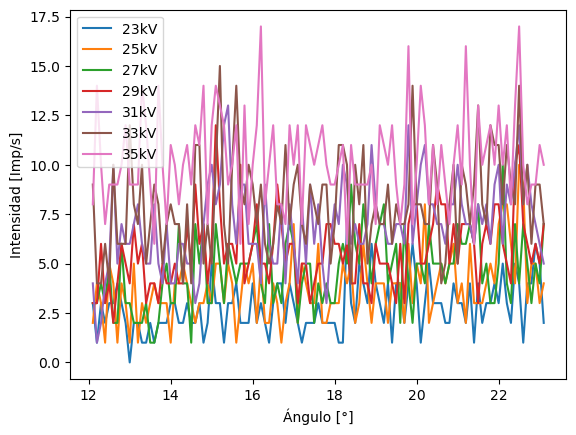

In [488]:
plt.plot(act4_ang,act4_23,label="23kV")
plt.plot(act4_ang,act4_25,label="25kV")
plt.plot(act4_ang,act4_27,label="27kV")
plt.plot(act4_ang,act4_29,label="29kV")
plt.plot(act4_ang,act4_31,label="31kV")
plt.plot(act4_ang,act4_33,label="33kV")
plt.plot(act4_ang,act4_35,label="35kV")
plt.xlabel("Ángulo [°]")
plt.ylabel("Intensidad [Imp/s]")
plt.legend()

# Actividad 4 - Ley de Duane-Hunt (Bien hecha)

Para hacer correctamente esta parte, los datos fueron obtenidos por el profesor Ronald Eliecer Rodríguez. Por ahora, no se ha hecho ningún cálculo porque no se sabe exactamente lo que toca hacer.

In [186]:
act4 = pd.read_csv("Actividad 4- Rayos X.csv", sep="	",skiprows=1, encoding="latin1",decimal=",")
act4

,theta/°,R(23kV)/Imp/s,R(25kV)/Imp/s,R(27kV)/Imp/s,R(29kV)/Imp/s,R(31kV)/Imp/s,R(33kV)/Imp/s,R(35kV)/Imp/s
0,14.0,1.0,2.0,4.0,11.0,4.0,5.0,12.0
1,14.1,3.0,5.0,5.0,4.0,7.0,9.0,10.0
2,14.2,5.0,3.0,5.0,5.0,6.0,5.0,11.0
3,14.3,3.0,5.0,6.0,6.0,7.0,8.0,6.0
4,14.4,5.0,4.0,6.0,4.0,10.0,6.0,15.0
...,...,...,...,...,...,...,...,...
106,24.6,3.0,3.0,6.0,6.0,9.0,11.0,7.0
107,24.7,3.0,5.0,4.0,4.0,7.0,9.0,11.0
108,24.8,3.0,3.0,2.0,8.0,7.0,7.0,7.0
109,24.9,2.0,3.0,3.0,8.0,3.0,6.0,11.0


In [187]:
act41_ang = act4["theta/°"] + calibre
act41_long = longitud_onda(act41_ang,d,best_fase)

In [188]:
longitud_onda(np.array([22.9]),d,best_fase)

array([1.5648627])

In [189]:
act41_23 = act4["R(23kV)/Imp/s"].to_numpy()
act41_25 = act4["R(25kV)/Imp/s"].to_numpy()
act41_27 = act4["R(27kV)/Imp/s"].to_numpy()
act41_29 = act4["R(29kV)/Imp/s"].to_numpy()
act41_31 = act4["R(31kV)/Imp/s"].to_numpy()
act41_33 = act4["R(33kV)/Imp/s"].to_numpy()
act41_35 = act4["R(35kV)/Imp/s"].to_numpy()

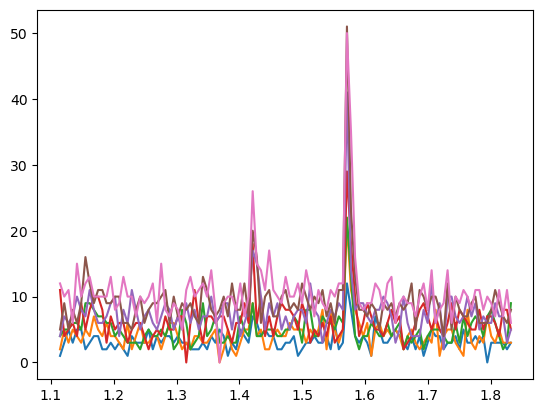

In [509]:
plt.plot(act41_long,act41_23) #slice minimum wavelenght: [35:55]
plt.plot(act41_long,act41_25)
plt.plot(act41_long,act41_27)
plt.plot(act41_long,act41_29)
plt.plot(act41_long,act41_31)
plt.plot(act41_long,act41_33)
plt.plot(act41_long,act41_35)

In [220]:
min_lambda = []
acts = [act41_23,act41_25,act41_27,act41_29,act41_31,act41_33,act41_35]

for i in acts:
    min_lambda.append(act41_long[np.argmax(i)])

In [221]:
min_lambda

[1.571338279062993,
 1.571338279062993,
 1.571338279062993,
 1.571338279062993,
 1.571338279062993,
 1.571338279062993,
 1.571338279062993]